## Titanic data set up

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# Read in the dataset - data sourced from https://www.kaggle.com/datasets/vinicius150987/titanic3
titanic = pd.read_excel('data_files/titanic3.xls')

In [45]:
# Review the data
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
# explore the data
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
# review the data file in terms of columns, non-nulls and data types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [124]:
# checking the amount of missing data
titanic.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<h5> Nulls appearing in the following columns:
 - age
 - fare
 - cabin
 - embarked
 - boat
 - body
 - home.dest

### Removing columns 'boat' and 'body'

In [125]:
# Removing cabin, boat and body number due to the large numebr of missing values, with over half not having a value.
titanic_df = titanic.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [127]:
# checking the number of missing data
titanic_df.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

### Age

In [16]:
# Looking at ways to fill the missing data in the age column
# Looking at average age grouped by sex and pclass
grouped = titanic_df.groupby(['pclass'])
grouped['age'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,284.0,39.159918,14.548059,0.9167,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638628,0.6667,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.1667,18.0,24.0,32.0,74.0


In [19]:
# Looking at ways to fill the missing data in the age column
# Looking at average age grouped by sex and pclass
grouped = titanic_df.groupby(['pclass', 'sex'])
grouped['age'].describe()

count       mean        std     min   25%   50%    75%   max
pclass sex                                                                 
1      female  133.0  37.037594  14.272460  2.0000  24.0  36.0  48.00  76.0
       male    151.0  41.029250  14.578590  0.9167  30.0  42.0  50.00  80.0
2      female  103.0  27.499191  12.911813  0.9167  20.0  28.0  34.00  60.0
       male    158.0  30.815401  13.977355  0.6667  23.0  29.5  38.75  70.0
3      female  152.0  22.185307  12.205294  0.1667  16.0  22.0  30.00  63.0
       male    349.0  25.962273  11.682395  0.3333  20.0  25.0  32.00  74.0

In [64]:
# creating function to code null age values based on the average age associated with passenger sex and pclass
def recode_age_nulls(cols):
    age = cols[0]
    pclass = cols[1]
    sex = cols[2]
  
    if pd.isnull(age):
        if pclass == 1 and sex == 'female':
            return 37
        elif pclass == 1 and sex == 'male':
            return 41
        elif pclass == 2 and sex == 'female':
            return 27
        elif pclass == 2 and sex == 'male':
            return 30
        elif pclass == 3 and sex == 'female':
            return 22
        else:
            return 25
    else:
        return age   
    
# applying the age function and checking dataframe
titanic_df['age_updated'] = titanic_df[['age', 'pclass', 'sex']].apply(recode_age_nulls, axis=1)
titanic_df[titanic_df.age.isnull()]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_updated
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,41.0
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,41.0
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,41.0
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,41.0
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,25.0
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S,25.0
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,25.0
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,25.0


In [128]:
# checking the number of missing data
titanic_df.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

### embarked

In [75]:
# Looking at values for embarked
titanic_df['embarked'].value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [76]:
# identifying the two rows with missing values
titanic_df[titanic_df.embarked.isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_updated,embarked_name
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,NaN


Online research found that both passengers with missing embarked data embarked at Southampton
https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [85]:
# updating missing values for embarked based off the above research
titanic_df.at[168, 'embarked'] = 'S'
titanic_df.at[284, 'embarked'] = 'S'

# checking change occured
titanic_df.loc[(titanic_df['name'] == 'Icard, Miss. Amelie' ) |
               (titanic_df['name'] == 'Stone, Mrs. George Nelson (Martha Evelyn)'), :]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_updated,embarked_name
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S,38.0,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S,62.0,NaN


In [86]:
# Creating a function to recode embarkment points with full names
def embarked_names(embarked):
    if embarked == 'S':
        return "Southampton (UK)"
    elif embarked == 'C':
        return "Cherbourg (FR)"
    elif embarked == 'Q':
        return "Queenstown (IE)"
    else:
        return embarked

In [89]:
# Calling the function and sving it to a new column
titanic_df['embarked_name'] = titanic_df['embarked'].apply(embarked_names)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_updated,embarked_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,29.0000,Southampton (UK)
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0.9167,Southampton (UK)
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,2.0000,Southampton (UK)
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,30.0000,Southampton (UK)
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,25.0000,Southampton (UK)


In [90]:
# checking missing values
titanic_df.isna().sum()

pclass             0
survived           0
name               0
sex                0
age              263
sibsp              0
parch              0
ticket             0
fare               1
embarked           0
age_updated        0
embarked_name      0
dtype: int64

### fare

In [92]:
# identifying the passenger with no far noted
titanic_df[titanic_df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_updated,embarked_name
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,60.5,Southampton (UK)


In [95]:
# finding out the average fare by sex and class
grouped = titanic_df.groupby(['pclass', 'sex'])
grouped['fare'].describe()

count        mean        std    min      25%       50%  \
pclass sex                                                              
1      female  144.0  109.412385  82.885854  25.70  55.4417  80.92915   
       male    179.0   69.888385  74.079427   0.00  27.7208  49.50420   
2      female  106.0   23.234827  11.239817  10.50  13.0000  23.00000   
       male    171.0   19.904946  14.775149   0.00  12.3500  13.00000   
3      female  216.0   15.324250  11.786512   6.75   7.7750  10.48960   
       male    492.0   12.415462  11.261638   0.00   7.7500   7.89580   

                      75%       max  
pclass sex                           
1      female  135.919775  512.3292  
       male     79.200000  512.3292  
2      female   26.250000   65.0000  
       male     26.000000   73.5000  
3      female   17.850000   69.5500  
       male      9.586450   69.5500

In [96]:
# updating missing values for Storey,Mr.Thomas based on the average value for a male travelling in thrid class
titanic_df.at[1225, 'fare'] = 12.4155

# checking change occured
titanic_df.loc[titanic_df['name'] == 'Storey, Mr. Thomas', :]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_updated,embarked_name
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,12.4155,S,60.5,Southampton (UK)


In [129]:
# checking missing values
titanic_df.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

### creating field to classify person as male, female, or child

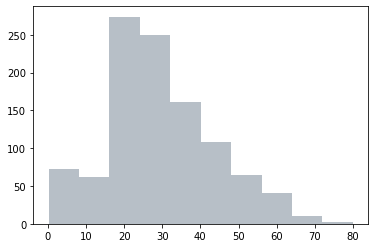

In [107]:
kwargs = dict(alpha=0.5)
plt.hist(titanic_df['age'], **kwargs, color='slategray');

In [117]:
# creating function to classify as adult or child
# child based on being under 16 years or age
def person_classification(cols):
    age = cols[0]
    sex = cols[1]

    if age < 16 and sex == 'male':
        return 'child_male'
    elif age < 16 and sex == 'female':
        return 'child_female'
    else:
        return sex
    
# applying the age function and checking dataframe
titanic_df['person'] = titanic_df[['age', 'sex']].apply(person_classification, axis=1)
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,age_updated,embarked_name,person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,29.0000,Southampton (UK),female
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0.9167,Southampton (UK),child_male
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,2.0000,Southampton (UK),child_female
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,30.0000,Southampton (UK),male
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,25.0000,Southampton (UK),female
